# Acoustics

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
from exact_solvers import acoustics, acoustics_demos
from IPython.display import IFrame, HTML, Image

In this chapter we consider our first *system* of hyperbolic conservation laws.  We study the acoustics equations that were introduced briefly in [Introduction](Introduction.ipynb).  We first describe the physical context of this system and then investigate its characteristic structure and the solution to the Riemann problem.  This system is described in more detail in Chapter 3 of <cite data-cite="fvmhp"><a href="riemann.html#fvmhp">(LeVeque 2002)</a></cite>.

If you wish to examine the Python code for this chapter, please see:

 - [exact_solvers/acoustics.py](exact_solvers/acoustics.py) ...
   [on github,](https://github.com/clawpack/riemann_book/blob/FA16/exact_solvers/acoustics.py)
 - [exact_solvers/acoustics_demos.py](exact_solvers/acoustics_demos.py) ...
   [on github.](https://github.com/clawpack/riemann_book/blob/FA16/exact_solvers/acoustics_demos.py)

## Physical setting
The linear acoustic equations describe the propagation of small perturbations in a fluid.  In [Advection](Advection.ipynb) we derived the one-dimensional continuity equation, which describes mass conservation:  
\begin{align} \label{Ac:continuity}
    \rho_t + (\rho u)_x & = 0.
\end{align}  
For more realistic fluid models, we need another equation that determines the velocity $u$.  This typically takes the form of a conservation law for the momentum $\rho u$.  Momentum, like density, is transported by fluid motion with corresponding flux $\rho u^2$.  Additionally, any difference in pressure will also lead to a flux of momentum that is proportional to the pressure difference.  Thus the momentum equation takes the form  
\begin{align} \label{Ac:mom_cons}
(\rho u)_t + (\rho u^2 + P(\rho))_x & = 0,
\end{align}  
where the pressure $P$ is is given by the equation of state $P(\rho)$; here we have assumed the pressure depends only on the density. A more general equation of state will be considered, along with fully nonlinear fluid motions, in [Euler](Euler.ipynb).  The linear acoustics equations focus on the behavior of small perturbations in the system above.

In order to derive the equations of linear acoustics, observe that equations (\ref{Ac:continuity})-(\ref{Ac:mom_cons}) form a hyperbolic system $q_t+f(q)_x=0$ with  
\begin{align*}
q & = \begin{bmatrix} \rho \\ \rho u \end{bmatrix} & 
f(q) & = \begin{bmatrix} \rho u \\ \rho u^2 + P(\rho) \end{bmatrix}
\end{align*}  
We will make use of the quasilinear form of a hyperbolic system:
$$q_t + f'(q) q_x = 0.$$  
Here $f'(q)$ denotes the Jacobian of the flux $f$ with respect to the conserved variables $q$.  In the present system, as is often the case, $f$ is most naturally written in terms of so-called primitive variables (in this case $\rho$ and $u$) rather than in terms of the conserved variables $q$.  In order to find the flux Jacobian (and thus the quasilinear form), we first write $f$ in terms of the conserved variables $(q_1,q_2) = (\rho, \rho u)$:  
\begin{align}
f(q) & = \begin{bmatrix} q_2 \\ q_2^2/q_1 + P(q_1) \end{bmatrix}.
\end{align}  

Now we can differentiate to find the flux Jacobian:  
\begin{align*}
f'(q) & = \begin{bmatrix} \partial f_1/\partial q_1 & \partial f_1/\partial q_2 \\
                          \partial f_2/\partial q_1 & \partial f_2/\partial q_2 \end{bmatrix} \\
      & = \begin{bmatrix} 0 & 1 \\ -q_2^2/q_1^2 + P'(q_1) & 2q_2/q_1 \end{bmatrix} \\
      & = \begin{bmatrix} 0 & 1 \\ P'(\rho)-u^2 & 2u \end{bmatrix}.
\end{align*}

Thus small perturbations to an ambient fluid state $\rho_0, u_0$ evolve according to the linearized equations $q_t + f'(q_0) q_x = 0$, or more explicitly
\begin{align*}
\rho_t + (\rho u)_x & = 0 \\
(\rho u)_t + (P'(\rho_0)-u_0^2)\rho_x + 2u_0(\rho u)_x & = 0.
\end{align*}  
As we are only interested in small perturbations of equation (\ref{Ac:mom_cons}), we expand the perturbations $\rho-\rho_0$ and $\rho u - \rho_0 u_0$ as functions of a small parameter $\epsilon$, and then we discard terms of order $\epsilon^2$ and higher. This results in the linear hyperbolic system  
\begin{align*}
p_t + u_0 p_x + P'(\rho_0) u_x & = 0 \\
u_t + \frac{1}{\rho_0} p_x + u_0 u_x & = 0,
\end{align*}
where $p(x,t)$ is the pressure as a function of $x$ and $t$. If the ambient fluid is at rest (i.e. $u_0=0$) and the pressure is directly proportional to the density, then this simplifies to
\begin{align} \label{Ac:main}
 \left[ \begin{array}{c}
p \\
u 
\end{array} \right]_t +  \underbrace{\left[ \begin{array}{cc}
0 & K_0 \\
1/\rho_0 & 0  \\
\end{array} \right]}_{\mathbf{A}}
\left[ \begin{array}{c}
p \\
u \end{array} \right]_x = 0,
\end{align}
where $K_0=P'(\rho_0)$ is referred to as the bulk modulus of compressibility. The system of equations (\ref{Ac:main}) is called the linear acoustics equations.

For the rest of this chapter we work with (\ref{Ac:main}) and let $q=[p,u]^T$.  Then we can write (\ref{Ac:main}) as $q_t + A q_x = 0$.  For simplicity, we also drop the subscripts on $K, \rho$.  Direct calculation reveals that the eigenvectors of $A$ are
\begin{align}
\lambda_1 = -c, \qquad \lambda_2 = c
\end{align}
where $c=\sqrt{{K}/{\rho}}$ is the speed of sound in a medium with a given density and bulk modulus. The right eigenvectors of $A$ are given by
\begin{align*}
r_1 = \begin{bmatrix}\begin{array}{c}-Z\\1\end{array}\end{bmatrix}, \qquad r_2 = \begin{bmatrix}\begin{array}{c}Z\\1\end{array}\end{bmatrix},
\end{align*}
where $Z=\rho c$ is called the acoustic impedance. Defining $R = [r_1 r_2]$ and $\Lambda = diag(\lambda_1, \lambda_2)$, we have $AR = R\Lambda$, or $A = R \Lambda R^{-1}$.  Substituting this into (\ref{Ac:main}) yields
\begin{align*}
q_t + A q_x & = 0 \\
q_t + R \Lambda R^{-1} q_x & = 0 \\
R^{-1}q_t + \Lambda R^{-1} q_x & = 0 \\
w_t + \Lambda w_x & = 0,
\end{align*}
where we have introduced the *characteristic variables* $w=R^{-1}q$.  The last system above is simply a pair of decoupled advection equations for $w_1$ and $w_2$, with velocities $\lambda_1$ and $\lambda_2$; a system we already know how to solve. Thus we see that the eigenvalues of $A$ are the velocities at which information propagates in the solution.

## Solution by characteristics

The discussion above suggests a strategy for solving the Cauchy problem:

1. Decompose the initial data $(p(x,0), u(x,0))$ into characteristic variables $w(x,0)=(w_1^0(x),w_2^0(x,0))$ using the relation $w = R^{-1}q$.
2. Evolve the characteristic variables: $w_p(x,t) = w_p^0(x-\lambda_p t)$.
3. Transform back to the physical variables: $q = Rw$.

The first step in this process amounts to expressing the vector $q$ in the basis given by $r_1, r_2$.  Solving the system $Rw=q$ yields 
\begin{align*}
q = w_1 r_1 + w_2 r_2,
\end{align*} 
where
\begin{align*}
w_1 = \frac{- p + Z u}{2Z}, \ \ \ \ \ \
w_2 = \frac{ p + Z u}{2Z}.
\end{align*}

We visualize this below, where the first plot shows the two eigenvectors, and the second plot shows how $q$ can be expressed as a linear combination of the two eigenvectors, $r_1$ and $r_2$.  *In the live notebook you can adjust the left and right states or the material parameters to see how this affects the construction of the Riemann solution.*

In [3]:
%matplotlib inline

In [4]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
from exact_solvers import acoustics, acoustics_demos
from IPython.display import IFrame

In [5]:
acoustics_demos.decompose_q_interactive()

interactive(children=(FloatSlider(value=1.0, description='p', max=1.0, min=-1.0), FloatSlider(value=0.3, descr…

Output()

In the second and third steps, we evolve the characteristic variables $w$ and then transform back to the original variables. We take as initial pressure a Gaussian, with zero initial velocity. We visualize this below, where the time evolution in the characteristic variables is shown in the first plot, and the time evolution of the velocity is shown in the second plot.

In [6]:
acoustics_demos.char_solution_interactive()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.2), FloatSlider(value=1.0, description='K'…

Output()

*In the live notebook, you can advance the above solutions in time and select which of the two characteristic variables to display.*
Notice how in the characteristic variables $w$ (plotted on the left), each part of the solution simply advects (translates) since each of the characteristics variables simply obeys an uncoupled advection equation.

## The Riemann problem

Now that we know how to solve the Cauchy problem, solution of the Riemann problem is merely a special case.  We have the special initial data  
\begin{align*}
q(x,0) = \begin{cases}
q_\ell & \text{if   } x \le 0, \\
q_r & \text{if   } x > 0.
\end{cases}
\end{align*}  
We can proceed as before, by decomposing into characteristic components, advecting, and then transforming back.  But since we know the solution will be constant almost everywhere, it's even simpler to just decompose the jump $\Delta q = q_r - q_\ell$ in terms of the characteristic variables, and advect the two resulting jumps $\Delta w_1$ and $\Delta w_2$:  
\begin{align*}
\Delta q = \Delta w_1 r_1 + \Delta w_2 r_2,
\end{align*}  
Since $R\Delta w = \Delta q$, we have  
\begin{align*}
\Delta w_1 = \frac{-\Delta p + Z\Delta u}{2Z}, \ \ \ \ \ \
\Delta w_2 = \frac{\Delta p + Z\Delta u}{2Z}.
\end{align*}  
Thus the solution has the structure depicted below.

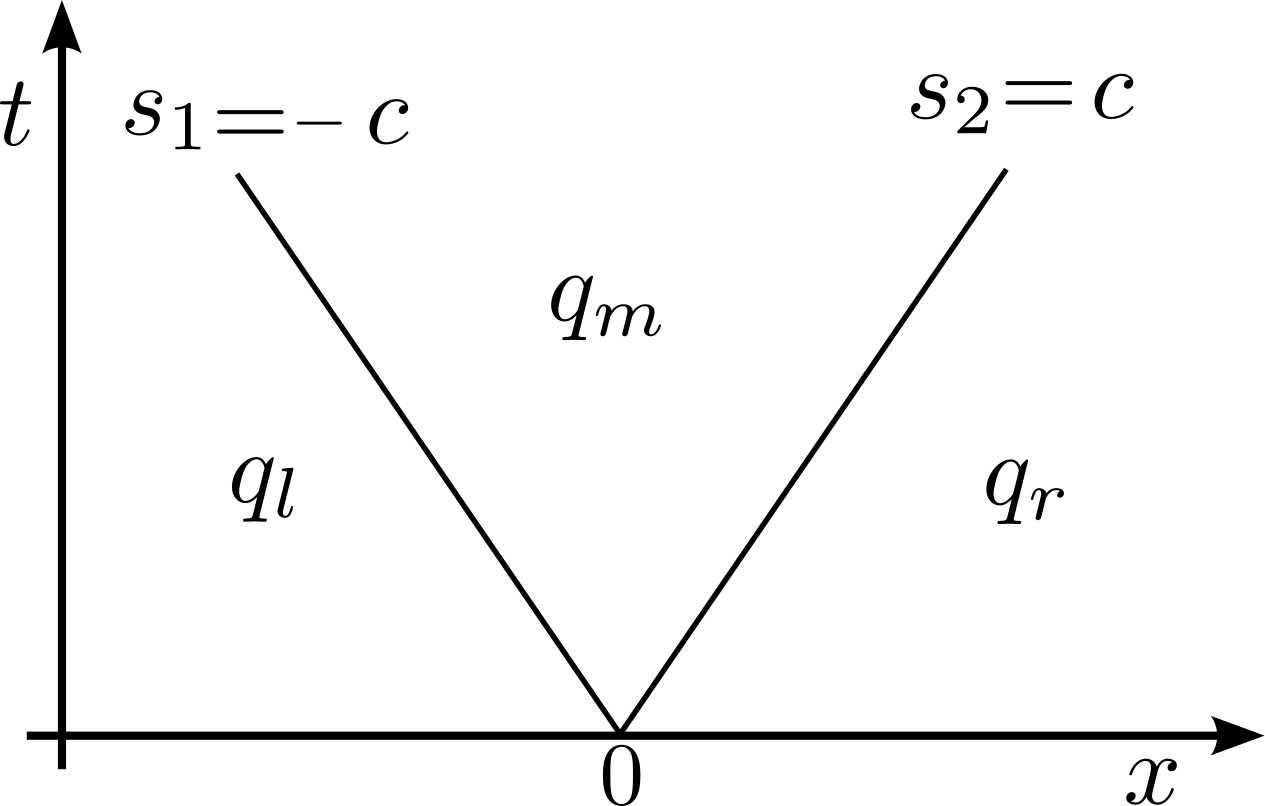

In [7]:
Image('figures/acoustics_xt_plane.png', width=350)

The three constant states are related by the jumps:   
\begin{align}
q_m = q_\ell + \Delta w_1 r_1 = q_r - \Delta w_2 r_2.
\label{eq:acussol}
\end{align}  
The jumps in pressure and velocity for each propagating discontinuity are related in a particular way, since each jump is a multiple of one of the eigenvectors of $A$.  More generally, the eigenvectors of the coefficient matrix of a linear hyperbolic system reveal the relation between jumps in the conserved variables across a wave propagating with speed given by the corresponding eigenvalue.  For acoustics, the impedance is the physical parameter that determines this relation.

### A simple solution
Here we provide some very simple initial data, and determine the Riemann solution, which consists of three states $q_\ell$, $q_m$ and $q_r$, and the speeds of the two waves.

In [8]:
# Initial data for Riemann problem
rho = 0.5               # density
bulk = 2.            # bulk modulus
ql = np.array([3,2])   # Left state
qr = np.array([3,-2])  # Right state
# Calculated parameters
c = np.sqrt(bulk/rho)  # calculate sound speed
Z = np.sqrt(bulk*rho)  # calculate impedance
print("With density rho = %g,  bulk modulus K = %g" \
      % (rho,bulk))
print("We compute: sound speed c = %g, impedance Z = %g \n" \
      % (c,Z))

With density rho = 0.5,  bulk modulus K = 2
We compute: sound speed c = 2, impedance Z = 1 



In [9]:
# Call and print Riemann solution
states, speeds, reval = \
    acoustics.exact_riemann_solution(ql ,qr, [rho, bulk])
    
print("The states ql, qm and qr are: ")
print(states, "\n")
print("The left and right wave speeds are:")
print(speeds)

The states ql, qm and qr are: 
[[ 3.  5.  3.]
 [ 2.  0. -2.]] 

The left and right wave speeds are:
[-2.  2.]


One way to visualize the Riemann solution for a system of two equations is by looking at the  $p-u$ phase plane. In the figure below, we show the two initial conditions of the Riemann problem $q_\ell$ and $q_r$ as points in the phase space; the lines passing through these points correspond to the eigenvectors, $r_1$ and $r_2$. 

The middle state $q_m$ is simply the intersection of the line in the direction $r_1$ passing through $q_\ell$ and the line in the direction $r_2$ passing through $q_r$. The structure of this solution becomes evident from equation (\ref{eq:acussol}).  The dashed lines correspond to a line in the direction $r_2$ passing through $q_\ell$ and a line in the direction $r_1$ passing through $q_r$; these also intersect, but cannot represent a Riemann solution since they would involve a wave going to the right but connected to $q_\ell$ and a wave going to the left but connected to $q_r$.

In the live notebook, the cell below allows you to interactively adjust the initial conditions the material parameters as well as the plot range, so that you can explore how the structure of the solution in the phase plane is affected by these quantities.

In [10]:
acoustics_demos.interactive_phase_plane(ql,qr,rho,bulk)

interactive(children=(FloatSlider(value=3.0, description='$p_l$', max=10.0, min=0.01), FloatSlider(value=2.0, …

Output()

Note that the eigenvectors are given in terms of the impedance $Z$, which depends on the density $\rho$
and the bulk modulus $K$. Therefore, when $\rho$ and $K$ are modified the eigenvectors change and consequently the slope of the lines changes as well.

## Examples
We will use the exact solver in [exact_solvers/acoustics.py](exact_solvers/acoustics.py) and the functions in [exact_solvers/acoustics_demos.py](exact_solvers/acoustics_demos.py) to plot interactive solutions for a few examples.

### Shock tube

If there is a jump in pressure and the velocity is zero in both initial states (the shock tube problem) then the resulting Riemann solution consists of pressure jumps of equal magnitude propagating in both directions, with equal and opposite jumps in velocity. This is the linearized version of what is known in fluid dynamics as a shock tube problem, since it emulates what would happen inside a shock tube, where the air is initially stationary and a separate chamber at the end of the tube is pressurized and then released.

In [11]:
ql = np.array([5,0])
qr = np.array([1,0])
rho = 1.0
bulk = 4.0
acoustics_demos.riemann_plot_pplane(ql,qr,rho,bulk)

interactive(children=(FloatSlider(value=0.0, description='$t$', max=1.0), Dropdown(description='Characs.', opt…

Output()

We can also observe the structure of the solution in the phase plane. In the second plot, we show the structure of the solution in the phase plane.

### Reflection from a wall

As another example, suppose the pressure is initially the same in the left and right states, while the velocities are non-zero with $u_r = -u_\ell > 0$.  The flow is converging from both sides and because of the symmetry of the initial states, the result is a middle state $q_m$ in which the velocity is 0 (and the pressure is higher than on either side).

In [12]:
ql = np.array([2,1])  
qr = np.array([2,-1])  
rho = 1.0
bulk = 1.5
acoustics_demos.riemann_plot_pplane(ql,qr,rho,bulk)

interactive(children=(FloatSlider(value=0.0, description='$t$', max=1.0), Dropdown(description='Characs.', opt…

Output()

We again show the Riemann solution in space and in the phase plane, where the symmetry is also evident.

Disregarding the left half of the domain ($x<0$), one can view this as a solution to the problem of an acoustic wave impacting a solid wall. The result is a reflected wave that moves away from the wall; notice that the velocity vanishes at the wall, as it must.
This type of Riemann solution is important when simulating waves in a domain with reflecting boundaries. The reflecting condition can be imposed by the use of fictitious *ghost cells* that lie just outside the domain and whose state is set by reflecting the interior solution with the symmetry just described (equal pressure, negated velocity).

In reality, at a material boundary only part of a wave is reflected while the rest is transmitted.  This can be accounted for by including the spatial variation in $\rho, K$ and solving a variable-coefficient Riemann problem.

### Interactive phase plane with solution at fixed time

For a more general exploration of the solution to the acoustics equation, we now show an interactive solution of the acoustics equations. The initial states $q_\ell$ and $q_r$ can be modified by dragging and dropping the points in the phase plane plot (in the notebook version, or on [this webpage](http://www.clawpack.org/riemann_book/phase_plane/acoustics_small.html)). 

In [13]:
IFrame(src='phase_plane/acoustics_small_notitle.html', 
       width=980, height=340)

### Gaussian initial condition
In this example, we use the first example described near the beginning of this chapter. The initial condition is a Gaussian pressure perturbation, while the initial velocity is zero. Reflecting boundary conditions are imposed at $x=-2$ and $x=2$, so the wave is fully reflected back, and we can see how it interacts with itself. This animation is produced using a numerical method from [PyClaw](http://www.clawpack.org/pyclaw/), and can be viewed in the interactive notebook or on [this webpage](http://www.clawpack.org/riemann_book/html/acoustics_bump_animation.html).

In [14]:
anim = acoustics_demos.bump_animation(numframes = 50)
HTML(anim)